In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as d
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
pd.options.mode.chained_assignment = None

### <font color='blue'>Analizimizi yapmak üzere, 26 Mart ile 3 Haziran arası 70 günlük veriyi seçtik.</font>

In [2]:
frames = [pd.read_csv(f'{date}.txt') for date in range(1,11)]
df = pd.concat(frames) 

In [4]:
df.reset_index(inplace = True)

In [5]:
df

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,00:00:00,REGULAR,7697197,2683684
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,04:00:00,REGULAR,7697200,2683687
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,08:00:00,REGULAR,7697204,2683713
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,12:00:00,REGULAR,7697219,2683805
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,16:00:00,REGULAR,7697278,2683874
...,...,...,...,...,...,...,...,...,...,...,...,...
2112683,211604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,05:00:00,REGULAR,0,433
2112684,211605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,09:00:00,REGULAR,0,433
2112685,211606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,13:00:00,REGULAR,0,433
2112686,211607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,17:00:00,REGULAR,0,435


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112688 entries, 0 to 2112687
Data columns (total 12 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   index                                                                 int64 
 1   C/A                                                                   object
 2   UNIT                                                                  object
 3   SCP                                                                   object
 4   STATION                                                               object
 5   LINENAME                                                              object
 6   DIVISION                                                              object
 7   DATE                                                                  object
 8   TIME                                                          

In [7]:
df.sample(10)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
296147,85128,N317,R267,02-06-01,46 ST,MR,IND,04/05/2022,05:00:00,REGULAR,340772,663480
659708,25352,C028,R216,01-05-00,BAY RIDGE-95 ST,R,BMT,04/20/2022,12:00:00,REGULAR,2361,0
1178825,122117,PTH06,R546,00-00-08,PAVONIA/NEWPORT,1,PTH,05/01/2022,06:33:12,REGULAR,148993,110441
1943023,41944,J017,R432,00-00-00,CHAUNCEY ST,JZ,BMT,06/02/2022,01:00:00,REGULAR,1093577,427866
71415,71415,N135,R385,01-03-01,ROCKAWAY BLVD,A,IND,04/01/2022,09:00:00,REGULAR,403924,51316
1800200,110828,N555,R423,00-00-01,AVENUE N,F,IND,05/27/2022,01:00:00,REGULAR,2073397,29758
258038,47019,N010,R126,00-05-00,175 ST,A,IND,04/08/2022,08:00:00,REGULAR,7505,0
1741856,52484,N049,R084,01-06-02,59 ST COLUMBUS,ABCD1,IND,05/21/2022,00:00:00,REGULAR,2833559,2432547
175067,175067,R294,R052,00-00-00,WOODLAWN,4,IRT,03/31/2022,20:00:00,REGULAR,9178359,7579574
1380754,112873,N601A,R319,01-00-01,LEXINGTON AV/63,F,IND,05/08/2022,04:00:00,REGULAR,5165,6781


### <font color='blue'>Sütun isimlerindeki gereksiz boşlukları kaldırdık.</font>

In [8]:
df.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [9]:
df.columns = [col.strip() for col in df.columns]

In [10]:
df.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

### <font color = "blue">Veris setimizde turnike bazlı tekrar eden verilerin olup olmadığını kontrol ettik.</font>

In [13]:
df.loc[df.duplicated(subset = ["C/A","UNIT","SCP","STATION","DATE","TIME"]),:]

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
266515,55496,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,04/07/2022,12:00:00,RECOVR AUD,75029,350907
266559,55540,N063A,R011,00-00-01,42 ST-PORT AUTH,ACENQRS1237W,IND,04/07/2022,12:00:00,RECOVR AUD,2956860,3595867
600079,177758,R314,R406,00-00-01,PROSPECT AV,25,IRT,04/12/2022,05:00:00,RECOVR AUD,12370723,1585597
803621,169265,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,00:00:00,RECOVR AUD,393216,0
803623,169267,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,04:00:00,RECOVR AUD,393216,0
803625,169269,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,08:00:00,RECOVR AUD,393216,0
803627,169271,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,12:00:00,RECOVR AUD,393216,0
803629,169273,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,16:00:00,RECOVR AUD,393216,0
803631,169275,R249,R179,01-05-01,86 ST,456,IRT,04/16/2022,20:00:00,RECOVR AUD,393216,0
803633,169277,R249,R179,01-05-01,86 ST,456,IRT,04/17/2022,00:00:00,RECOVR AUD,393216,0


In [14]:
len(df.loc[df.duplicated(subset = ["C/A","UNIT","SCP","STATION","LINENAME","DIVISION","DATE","TIME"]),:])

57

### <font color="blue">57 satırın tekrar eden veriler olduğunu gördük. Ancak tekrar eden hangi veriyi silmeliyiz sorusuna cevap verebilmek için tekrar eden verilerden ilkini inceledik.</font>

In [15]:
mask = (df["C/A"] == "N063A") & (df.UNIT == "R011") & (df.SCP=="00-00-00") & (df.STATION=="42 ST-PORT AUTH") & (df.LINENAME=="ACENQRS1237W") & (df.DIVISION== "IND") & (df.DATE == "04/07/2022" )& (df.TIME == "12:00:00")
df[mask]

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
266514,55495,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,04/07/2022,12:00:00,REGULAR,2346269,10840267
266515,55496,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,04/07/2022,12:00:00,RECOVR AUD,75029,350907


 <font color="blue"> Tekrar eden verilerde 55496. satırdaki veri aslında kendinden bir önceki satırın aynısı, yani aynı turnikenin verilerine sahip ancak farklı entries  ve exits değerlerine sahip. Esas olması gereken değeri saptayabilmek için bir sonraki saat dilimindeki entries ve exits değerlerine bakalım. Yani 04/07/2022 saat: 16:00:00</font>

In [16]:
mask2 = (df["C/A"] == "N063A") & (df.UNIT == "R011") & (df.SCP=="00-00-00") & (df.STATION=="42 ST-PORT AUTH") & (df.LINENAME=="ACENQRS1237W") & (df.DIVISION== "IND") & (df.DATE == "04/07/2022" )& (df.TIME == "16:00:00")
df[mask2]

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
266516,55497,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,04/07/2022,16:00:00,REGULAR,2346323,10841658


### <font color="blue">Burada da gördük ki ikinci tekrar bizi doğru sonuçtan uzaklaştırıyor. </font>

In [17]:
df.iloc[1436906:1436909]

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
1436906,169025,R249,R179,01-05-01,86 ST,456,IRT,05/11/2022,12:00:00,REGULAR,131072,256
1436907,169026,R249,R179,01-05-01,86 ST,456,IRT,05/11/2022,12:00:00,RECOVR AUD,393216,576
1436908,169027,R249,R179,01-05-01,86 ST,456,IRT,05/11/2022,16:00:00,REGULAR,131072,259


<font color="blue">Tekrar eden verilerden sonuncusu için de kontrol ettik. Orada da durum aynı recover data yani sonradan alınana veri doğru değil.</font>

### <font color="blue">Tekrar eden verileri verisetimizden temizliyoruz.</font>

In [18]:
df.drop_duplicates(subset = ["C/A","UNIT","SCP","STATION","DATE","TIME"],inplace=True)

In [28]:
df.reset_index(inplace=True)

In [31]:
df.drop("index",axis=1,inplace=True)

In [33]:
df.drop("level_0",axis=1,inplace=True)

In [34]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,00:00:00,REGULAR,7697197,2683684
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,04:00:00,REGULAR,7697200,2683687
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,08:00:00,REGULAR,7697204,2683713
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,12:00:00,REGULAR,7697219,2683805
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,16:00:00,REGULAR,7697278,2683874
...,...,...,...,...,...,...,...,...,...,...,...
2112626,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,05:00:00,REGULAR,0,433
2112627,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,09:00:00,REGULAR,0,433
2112628,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,13:00:00,REGULAR,0,433
2112629,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,17:00:00,REGULAR,0,435


### <font color="blue">C/A, UNIT, SCP, STATION sütunları her turnike için spesifik olmalı. Bundan dolayı turnike bazlı giriş çkışaları kontrol edebilmek için bu dört değerin ortak olduğu "turnstile" sütunu oluşturduk.

In [35]:
df["turnstile"] = list([i[0]+"*"+i[1]+"*"+i[2]+"*"+i[3] for i in zip(df["C/A"],df.UNIT,df.SCP,df.STATION)])

In [36]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,00:00:00,REGULAR,7697197,2683684,A002*R051*02-00-00*59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,04:00:00,REGULAR,7697200,2683687,A002*R051*02-00-00*59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,08:00:00,REGULAR,7697204,2683713,A002*R051*02-00-00*59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,12:00:00,REGULAR,7697219,2683805,A002*R051*02-00-00*59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,16:00:00,REGULAR,7697278,2683874,A002*R051*02-00-00*59 ST
...,...,...,...,...,...,...,...,...,...,...,...,...
2112626,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,05:00:00,REGULAR,0,433,TRAM2*R469*00-05-01*RIT-ROOSEVELT
2112627,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,09:00:00,REGULAR,0,433,TRAM2*R469*00-05-01*RIT-ROOSEVELT
2112628,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,13:00:00,REGULAR,0,433,TRAM2*R469*00-05-01*RIT-ROOSEVELT
2112629,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,17:00:00,REGULAR,0,435,TRAM2*R469*00-05-01*RIT-ROOSEVELT


### <font color="blue"> Entries ve exits değerlerimiz cumulative sum olduğu için her saat aralığında geçen net insan sayısını sayısını belirlemek için net_entries ve net_exits sütunlarını oluşturduk.  

In [42]:
df["net_entries"]=df.ENTRIES.shift(-1) - df.ENTRIES
df["net_exits"] = df.EXITS.shift(-1) - df.EXITS

In [43]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile,net_entries,net_exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,00:00:00,REGULAR,7697197,2683684,A002*R051*02-00-00*59 ST,3.0,3.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,04:00:00,REGULAR,7697200,2683687,A002*R051*02-00-00*59 ST,4.0,26.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,08:00:00,REGULAR,7697204,2683713,A002*R051*02-00-00*59 ST,15.0,92.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,12:00:00,REGULAR,7697219,2683805,A002*R051*02-00-00*59 ST,59.0,69.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,16:00:00,REGULAR,7697278,2683874,A002*R051*02-00-00*59 ST,61.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112626,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,05:00:00,REGULAR,0,433,TRAM2*R469*00-05-01*RIT-ROOSEVELT,0.0,0.0
2112627,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,09:00:00,REGULAR,0,433,TRAM2*R469*00-05-01*RIT-ROOSEVELT,0.0,0.0
2112628,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,13:00:00,REGULAR,0,433,TRAM2*R469*00-05-01*RIT-ROOSEVELT,0.0,2.0
2112629,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,17:00:00,REGULAR,0,435,TRAM2*R469*00-05-01*RIT-ROOSEVELT,0.0,0.0


In [44]:
df.describe()

,ENTRIES,EXITS,net_entries,net_exits
count,2.112631e+06,2.112631e+06,2.112630e+06,2.112630e+06
mean,4.302123e+07,3.465365e+07,-3.643419e+00,-1.270099e+00
std,2.237090e+08,1.974029e+08,4.723948e+07,4.215195e+07
min,0.000000e+00,0.000000e+00,-2.144161e+09,-2.107676e+09
25%,2.492350e+05,1.328045e+05,4.000000e+00,6.000000e+00
50%,1.352712e+06,8.874520e+05,2.800000e+01,3.700000e+01
75%,5.959682e+06,3.975428e+06,9.800000e+01,1.190000e+02
max,2.147309e+09,2.122390e+09,2.146858e+09,2.121514e+09


<font color="blue"> net entries ve net exits sütunlarımıza baktığımızda, minimum değer negatif olmamalıydı. maximum değerlerimiz de bu derece büyük olmamalı. O zaman bu aykırı değerlerimiz nelermiş ve kaç taneymiş kontrol edelim.

### <font color="blue">Her saniyede bir kişi geçtiğini varsaysak 4 saatlik aralıklarda maximum 4*60*60=14400 kişi geçebilir.

In [45]:
df[(df.net_entries<0) | (df.net_entries>14400) | (df.net_exits<0) | (df.net_exits>14400)]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile,net_entries,net_exits
41,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2022,20:00:00,REGULAR,7698959,2686941,A002*R051*02-00-00*59 ST,-887246.0,-1104137.0
83,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/01/2022,20:00:00,REGULAR,6813921,1584508,A002*R051*02-00-01*59 ST,-5320793.0,4112808.0
125,A002,R051,02-03-00,59 ST,NQR456W,BMT,04/01/2022,20:00:00,REGULAR,1494589,5705866,A002*R051*02-03-00*59 ST,255993.0,-2916356.0
167,A002,R051,02-03-01,59 ST,NQR456W,BMT,04/01/2022,20:00:00,REGULAR,1754070,2797751,A002*R051*02-03-01*59 ST,-1593482.0,-2558525.0
209,A002,R051,02-03-02,59 ST,NQR456W,BMT,04/01/2022,20:00:00,REGULAR,163761,244655,A002*R051*02-03-02*59 ST,6111042.0,6907281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112420,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,06/03/2022,21:00:00,REGULAR,1192154,30461,TRAM2*R469*00-00-00*RIT-ROOSEVELT,2905536.0,29070.0
2112462,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,06/03/2022,21:00:00,REGULAR,4107179,59729,TRAM2*R469*00-00-01*RIT-ROOSEVELT,-3288398.0,-26083.0
2112504,TRAM2,R469,00-03-00,RIT-ROOSEVELT,R,RIT,06/03/2022,21:00:00,REGULAR,820331,33741,TRAM2*R469*00-03-00*RIT-ROOSEVELT,2387533.0,368473.0
2112546,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/03/2022,21:00:00,REGULAR,3209499,402336,TRAM2*R469*00-03-01*RIT-ROOSEVELT,-2876596.0,-402336.0


### <font color="blue">75286 satır aykırı değerlere sahip. Yani toplam 2112631 satır verimizin yaklaşık %3.56'sı aykırı değerlere sahip. Ve bu miktarın silineblir olduğunu düşünerek bu satırları verimizden siliyoruz.  

In [46]:
df.drop(df[(df.net_entries<0) | (df.net_entries>14400) | (df.net_exits<0) | (df.net_exits>14400)].index,inplace=True)

In [47]:
df.reset_index(inplace=True)

In [50]:
df.drop("index",axis=1,inplace=True)

In [54]:
df.dropna(inplace=True)

In [55]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile,net_entries,net_exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,00:00:00,REGULAR,7697197,2683684,A002*R051*02-00-00*59 ST,3.0,3.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,04:00:00,REGULAR,7697200,2683687,A002*R051*02-00-00*59 ST,4.0,26.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,08:00:00,REGULAR,7697204,2683713,A002*R051*02-00-00*59 ST,15.0,92.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,12:00:00,REGULAR,7697219,2683805,A002*R051*02-00-00*59 ST,59.0,69.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,16:00:00,REGULAR,7697278,2683874,A002*R051*02-00-00*59 ST,61.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037339,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,01:00:00,REGULAR,0,433,TRAM2*R469*00-05-01*RIT-ROOSEVELT,0.0,0.0
2037340,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,05:00:00,REGULAR,0,433,TRAM2*R469*00-05-01*RIT-ROOSEVELT,0.0,0.0
2037341,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,09:00:00,REGULAR,0,433,TRAM2*R469*00-05-01*RIT-ROOSEVELT,0.0,0.0
2037342,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,13:00:00,REGULAR,0,433,TRAM2*R469*00-05-01*RIT-ROOSEVELT,0.0,2.0


In [56]:
df.describe()

,ENTRIES,EXITS,net_entries,net_exits
count,2.037344e+06,2.037344e+06,2.037344e+06,2.037344e+06
mean,2.866171e+07,2.216577e+07,7.105809e+01,9.234221e+01
std,1.677086e+08,1.462823e+08,1.221716e+02,1.590938e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.416072e+05,1.295210e+05,4.000000e+00,7.000000e+00
50%,1.302732e+06,8.573940e+05,2.900000e+01,3.800000e+01
75%,5.775358e+06,3.752494e+06,9.700000e+01,1.160000e+02
max,2.147285e+09,2.064400e+09,1.419500e+04,1.434700e+04


<font color="blue"> Her turnikeden geçen toplam insan saysını tutabilmek için "each_turnstile_data" verisetini oluşurup, her turnikeden farklı zamanlarda ve tarihlerde geçen insan sayısının toplamıyla yeni verisetimizi dolduruyoruz.

In [59]:
each_turnstile_data = pd.DataFrame(df.groupby("turnstile").net_entries.sum())

In [61]:
each_turnstile_data.reset_index(inplace=True)

In [69]:
each_turnstile_data["net_exits"] = list(df.groupby("turnstile").net_exits.sum())

In [70]:
each_turnstile_data

,turnstile,net_entries,net_exits
0,A002*R051*02-00-00*59 ST,22949.0,27457.0
1,A002*R051*02-00-01*59 ST,23640.0,14637.0
2,A002*R051*02-03-00*59 ST,14568.0,79393.0
3,A002*R051*02-03-01*59 ST,34359.0,79666.0
4,A002*R051*02-03-02*59 ST,30348.0,54409.0
...,...,...,...
5011,TRAM2*R469*00-00-01*RIT-ROOSEVELT,96110.0,1871.0
5012,TRAM2*R469*00-03-00*RIT-ROOSEVELT,16701.0,801.0
5013,TRAM2*R469*00-03-01*RIT-ROOSEVELT,17379.0,1254.0
5014,TRAM2*R469*00-05-00*RIT-ROOSEVELT,5184.0,0.0


<font color="blue"> Turnikelerin istasyonlarını gösterecek sütunu ekleyelim.

In [72]:
each_turnstile_data["station"] = [i.split("*")[-1] for i in each_turnstile_data.turnstile]
each_turnstile_data

,turnstile,net_entries,net_exits,station
0,A002*R051*02-00-00*59 ST,22949.0,27457.0,59 ST
1,A002*R051*02-00-01*59 ST,23640.0,14637.0,59 ST
2,A002*R051*02-03-00*59 ST,14568.0,79393.0,59 ST
3,A002*R051*02-03-01*59 ST,34359.0,79666.0,59 ST
4,A002*R051*02-03-02*59 ST,30348.0,54409.0,59 ST
...,...,...,...,...
5011,TRAM2*R469*00-00-01*RIT-ROOSEVELT,96110.0,1871.0,RIT-ROOSEVELT
5012,TRAM2*R469*00-03-00*RIT-ROOSEVELT,16701.0,801.0,RIT-ROOSEVELT
5013,TRAM2*R469*00-03-01*RIT-ROOSEVELT,17379.0,1254.0,RIT-ROOSEVELT
5014,TRAM2*R469*00-05-00*RIT-ROOSEVELT,5184.0,0.0,RIT-ROOSEVELT


<font color="blue"> Şimdi de bir duraktaki tüm turnikelerden geçen total kişi sayısını hesaplayıp yeni bir dataframe'de tutalım.

In [76]:
each_station_data = pd.DataFrame(each_turnstile_data.groupby("station").net_entries.sum())
each_station_data.reset_index(inplace=True)
each_station_data

,station,net_entries
0,1 AV,515865.0
1,103 ST,839895.0
2,103 ST-CORONA,736674.0
3,104 ST,224158.0
4,110 ST,309780.0
...,...,...
374,WOODLAWN,211210.0
375,WORLD TRADE CTR,367187.0
376,WTC-CORTLANDT,350534.0
377,YORK ST,294805.0


In [78]:
each_station_data["net_exits"] = list(each_turnstile_data.groupby("station").net_exits.sum())
each_station_data

,station,net_entries,net_exits
0,1 AV,515865.0,1164268.0
1,103 ST,839895.0,1014961.0
2,103 ST-CORONA,736674.0,867259.0
3,104 ST,224158.0,216201.0
4,110 ST,309780.0,458957.0
...,...,...,...
374,WOODLAWN,211210.0,83081.0
375,WORLD TRADE CTR,367187.0,474331.0
376,WTC-CORTLANDT,350534.0,500347.0
377,YORK ST,294805.0,356412.0


In [79]:
each_station_data["total"] = each_station_data.net_entries + each_station_data.net_exits
each_station_data

,station,net_entries,net_exits,total
0,1 AV,515865.0,1164268.0,1680133.0
1,103 ST,839895.0,1014961.0,1854856.0
2,103 ST-CORONA,736674.0,867259.0,1603933.0
3,104 ST,224158.0,216201.0,440359.0
4,110 ST,309780.0,458957.0,768737.0
...,...,...,...,...
374,WOODLAWN,211210.0,83081.0,294291.0
375,WORLD TRADE CTR,367187.0,474331.0,841518.0
376,WTC-CORTLANDT,350534.0,500347.0,850881.0
377,YORK ST,294805.0,356412.0,651217.0


### <font color="orange"> Giriş değerlerine göre sıraladım.

In [83]:
each_station_data.sort_values("net_entries",ascending=False).head(10)

,station,net_entries,net_exits,total
61,34 ST-PENN STA,3427142.0,5383486.0,8810628.0
233,GRD CNTRL-42 ST,2721932.0,4561156.0,7283088.0
59,34 ST-HERALD SQ,2491834.0,4027653.0,6519487.0
46,23 ST,2346835.0,3240252.0,5587087.0
110,86 ST,2263857.0,3444341.0,5708198.0
14,14 ST-UNION SQ,2114597.0,3699157.0,5813754.0
353,TIMES SQ-42 ST,2109271.0,3524019.0,5633290.0
68,42 ST-PORT AUTH,2107692.0,3068211.0,5175903.0
9,125 ST,2016285.0,2831623.0,4847908.0
226,FULTON ST,1955338.0,3009607.0,4964945.0


### <font color="orange"> Çıkış değerlerine göre sıraladım.

In [84]:
each_station_data.sort_values("net_exits",ascending=False).head(10)

,station,net_entries,net_exits,total
61,34 ST-PENN STA,3427142.0,5383486.0,8810628.0
233,GRD CNTRL-42 ST,2721932.0,4561156.0,7283088.0
59,34 ST-HERALD SQ,2491834.0,4027653.0,6519487.0
14,14 ST-UNION SQ,2114597.0,3699157.0,5813754.0
353,TIMES SQ-42 ST,2109271.0,3524019.0,5633290.0
110,86 ST,2263857.0,3444341.0,5708198.0
46,23 ST,2346835.0,3240252.0,5587087.0
68,42 ST-PORT AUTH,2107692.0,3068211.0,5175903.0
226,FULTON ST,1955338.0,3009607.0,4964945.0
9,125 ST,2016285.0,2831623.0,4847908.0


### <font color="orange"> Hem giriş hem çıkış değerlerini toplayarak sıraladım.

In [88]:
each_station_data.sort_values("total",ascending=False).head(10)

,station,net_entries,net_exits,total
61,34 ST-PENN STA,3427142.0,5383486.0,8810628.0
233,GRD CNTRL-42 ST,2721932.0,4561156.0,7283088.0
59,34 ST-HERALD SQ,2491834.0,4027653.0,6519487.0
14,14 ST-UNION SQ,2114597.0,3699157.0,5813754.0
110,86 ST,2263857.0,3444341.0,5708198.0
353,TIMES SQ-42 ST,2109271.0,3524019.0,5633290.0
46,23 ST,2346835.0,3240252.0,5587087.0
68,42 ST-PORT AUTH,2107692.0,3068211.0,5175903.0
226,FULTON ST,1955338.0,3009607.0,4964945.0
9,125 ST,2016285.0,2831623.0,4847908.0


In [92]:
busiest_stations= pd.DataFrame(each_station_data.sort_values("total",ascending=False).head(10))
busiest_stations

,station,net_entries,net_exits,total
61,34 ST-PENN STA,3427142.0,5383486.0,8810628.0
233,GRD CNTRL-42 ST,2721932.0,4561156.0,7283088.0
59,34 ST-HERALD SQ,2491834.0,4027653.0,6519487.0
14,14 ST-UNION SQ,2114597.0,3699157.0,5813754.0
110,86 ST,2263857.0,3444341.0,5708198.0
353,TIMES SQ-42 ST,2109271.0,3524019.0,5633290.0
46,23 ST,2346835.0,3240252.0,5587087.0
68,42 ST-PORT AUTH,2107692.0,3068211.0,5175903.0
226,FULTON ST,1955338.0,3009607.0,4964945.0
9,125 ST,2016285.0,2831623.0,4847908.0


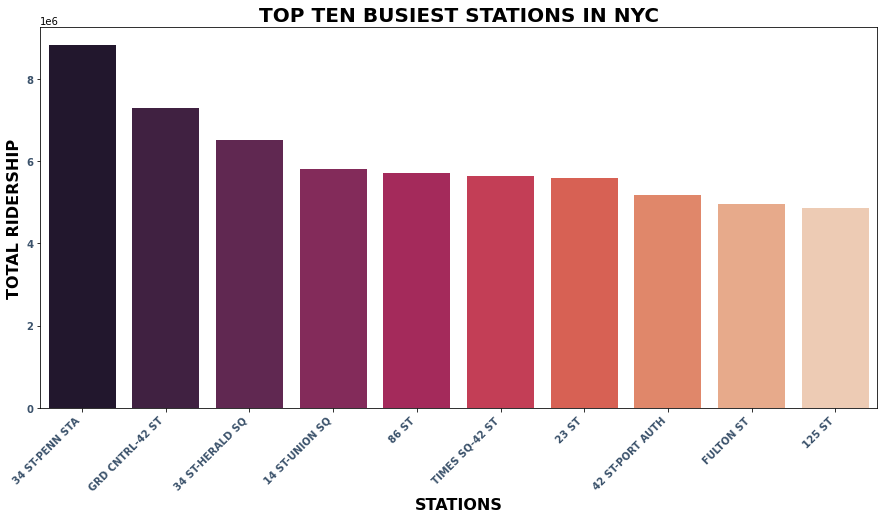

In [118]:
plt.figure(figsize=[15,7])
sns.barplot(x=busiest_stations.station,y=busiest_stations.total,palette="rocket")
plt.xlabel("STATIONS",fontsize=16,weight="bold");
plt.xticks(ha="right",rotation=45,color=(0.23,0.32,0.42),weight="bold")
plt.yticks(color=(0.23,0.32,0.42),weight="bold")
plt.ylabel("TOTAL RIDERSHIP",fontsize=16,weight="bold")
plt.title("TOP TEN BUSIEST STATIONS IN NYC",fontsize=20,weight="bold");

# En yoğun istasyon: <font color= "dark pink">34 ST-PENN STA 

# <font color="blue"> Şimdi en yoğun istasyonun günlük ve saatlik analizini yapalım.

In [119]:
df_34_st_penn_sta = df[df.STATION == "34 ST-PENN STA"]
df_34_st_penn_sta

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile,net_entries,net_exits
53642,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,03/26/2022,00:00:00,REGULAR,352719,1028666,N067*R012*00-00-00*34 ST-PENN STA,5.0,5.0
53643,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,03/26/2022,04:00:00,REGULAR,352724,1028671,N067*R012*00-00-00*34 ST-PENN STA,8.0,72.0
53644,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,03/26/2022,08:00:00,REGULAR,352732,1028743,N067*R012*00-00-00*34 ST-PENN STA,40.0,165.0
53645,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,03/26/2022,12:00:00,REGULAR,352772,1028908,N067*R012*00-00-00*34 ST-PENN STA,89.0,208.0
53646,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,03/26/2022,16:00:00,REGULAR,352861,1029116,N067*R012*00-00-00*34 ST-PENN STA,80.0,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968818,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/03/2022,02:00:00,REGULAR,68155702,18956145,R142*R293*01-06-01*34 ST-PENN STA,2.0,10.0
1968819,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/03/2022,06:00:00,REGULAR,68155704,18956155,R142*R293*01-06-01*34 ST-PENN STA,34.0,180.0
1968820,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/03/2022,10:00:00,REGULAR,68155738,18956335,R142*R293*01-06-01*34 ST-PENN STA,75.0,160.0
1968821,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/03/2022,14:00:00,REGULAR,68155813,18956495,R142*R293*01-06-01*34 ST-PENN STA,76.0,161.0


In [121]:
df_34_st_penn_sta.DATE = [d.strptime(date,"%m/%d/%Y") for date in df_34_st_penn_sta.DATE]

In [123]:
df_34_st_penn_sta["day"] = [d.strftime(date,'%A') for date in df_34_st_penn_sta.DATE]
df_34_st_penn_sta

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile,net_entries,net_exits,day
53642,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2022-03-26,00:00:00,REGULAR,352719,1028666,N067*R012*00-00-00*34 ST-PENN STA,5.0,5.0,Saturday
53643,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2022-03-26,04:00:00,REGULAR,352724,1028671,N067*R012*00-00-00*34 ST-PENN STA,8.0,72.0,Saturday
53644,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2022-03-26,08:00:00,REGULAR,352732,1028743,N067*R012*00-00-00*34 ST-PENN STA,40.0,165.0,Saturday
53645,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2022-03-26,12:00:00,REGULAR,352772,1028908,N067*R012*00-00-00*34 ST-PENN STA,89.0,208.0,Saturday
53646,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2022-03-26,16:00:00,REGULAR,352861,1029116,N067*R012*00-00-00*34 ST-PENN STA,80.0,143.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968818,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,2022-06-03,02:00:00,REGULAR,68155702,18956145,R142*R293*01-06-01*34 ST-PENN STA,2.0,10.0,Friday
1968819,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,2022-06-03,06:00:00,REGULAR,68155704,18956155,R142*R293*01-06-01*34 ST-PENN STA,34.0,180.0,Friday
1968820,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,2022-06-03,10:00:00,REGULAR,68155738,18956335,R142*R293*01-06-01*34 ST-PENN STA,75.0,160.0,Friday
1968821,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,2022-06-03,14:00:00,REGULAR,68155813,18956495,R142*R293*01-06-01*34 ST-PENN STA,76.0,161.0,Friday


### <font color="blue">Günlük ortalama insan sayısını hesaplayalım.

In [131]:
day_by_day = pd.DataFrame(df_34_st_penn_sta.groupby("DATE").net_entries.sum())
day_by_day["net_exits"] = df_34_st_penn_sta.groupby("DATE").net_exits.sum()
day_by_day["total"] = day_by_day.net_entries + day_by_day.net_exits
day_by_day["day"] = [d.strftime(date,'%A') for date in day_by_day.index]
day_by_day

,net_entries,net_exits,total,day
DATE,,,,
2022-03-26,35310.0,59707.0,95017.0,Saturday
2022-03-27,30840.0,49576.0,80416.0,Sunday
2022-03-28,56413.0,83568.0,139981.0,Monday
2022-03-29,61054.0,90067.0,151121.0,Tuesday
2022-03-30,62262.0,92925.0,155187.0,Wednesday
...,...,...,...,...
2022-05-30,28067.0,40258.0,68325.0,Monday
2022-05-31,57736.0,85080.0,142816.0,Tuesday
2022-06-01,61706.0,97466.0,159172.0,Wednesday


In [137]:
day_analysis= pd.DataFrame(day_by_day.groupby("day").total.mean())
day_analysis

,total
day,
Friday,127922.4
Monday,128203.8
Saturday,91300.7
Sunday,74965.9
Thursday,152365.0
Tuesday,152114.5
Wednesday,154190.5


In [144]:
# günlere göre sıralmayı beceremedim. ondan burayı yazdım.
days=[("Monday",1),("Tuesday",2),("Wednesday",3),("Thursday",4),("Friday",5),("Saturday",6),("Sunday",7)]
indexes=[]
for day in day_analysis.index:
    for i in range(7):
        if day == days[i][0]:
            indexes.append(days[i][1])
day_analysis["indexes"]=indexes
day_analysis.sort_values(by="index",inplace=True)
day_analysis

,total,index,indexes
day,,,
Monday,128203.8,1,1
Tuesday,152114.5,2,2
Wednesday,154190.5,3,3
Thursday,152365.0,4,4
Friday,127922.4,5,5
Saturday,91300.7,6,6
Sunday,74965.9,7,7


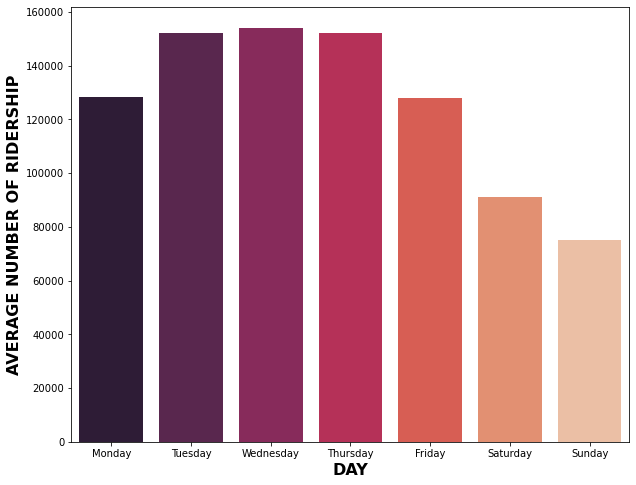

In [151]:
plt.figure(figsize=[10,8])
sns.barplot(x=day_analysis.index,y=day_analysis.total,palette="rocket")
plt.xlabel("DAY",fontsize=16,weight="bold")
plt.ylabel("AVERAGE NUMBER OF RIDERSHIP",fontsize=16,weight="bold");

# <FONT COLOR="blue"> Sırada bu durağın saat analizi var.

In [152]:
df_34_st_penn_sta

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile,net_entries,net_exits,day
53642,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2022-03-26,00:00:00,REGULAR,352719,1028666,N067*R012*00-00-00*34 ST-PENN STA,5.0,5.0,Saturday
53643,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2022-03-26,04:00:00,REGULAR,352724,1028671,N067*R012*00-00-00*34 ST-PENN STA,8.0,72.0,Saturday
53644,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2022-03-26,08:00:00,REGULAR,352732,1028743,N067*R012*00-00-00*34 ST-PENN STA,40.0,165.0,Saturday
53645,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2022-03-26,12:00:00,REGULAR,352772,1028908,N067*R012*00-00-00*34 ST-PENN STA,89.0,208.0,Saturday
53646,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,2022-03-26,16:00:00,REGULAR,352861,1029116,N067*R012*00-00-00*34 ST-PENN STA,80.0,143.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968818,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,2022-06-03,02:00:00,REGULAR,68155702,18956145,R142*R293*01-06-01*34 ST-PENN STA,2.0,10.0,Friday
1968819,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,2022-06-03,06:00:00,REGULAR,68155704,18956155,R142*R293*01-06-01*34 ST-PENN STA,34.0,180.0,Friday
1968820,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,2022-06-03,10:00:00,REGULAR,68155738,18956335,R142*R293*01-06-01*34 ST-PENN STA,75.0,160.0,Friday
1968821,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,2022-06-03,14:00:00,REGULAR,68155813,18956495,R142*R293*01-06-01*34 ST-PENN STA,76.0,161.0,Friday


In [153]:
df_34_st_penn_sta.TIME.unique()

array(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00',
       '20:00:00', '02:00:00', '06:00:00', '10:00:00', '14:00:00',
       '18:00:00', '22:00:00', '09:42:47', '15:01:50', '15:27:59',
       '15:29:02', '15:30:04', '15:31:31', '06:54:52', '06:56:25',
       '06:57:49', '06:59:09', '07:00:30', '07:01:49', '07:03:09',
       '04:58:12', '04:59:33', '05:00:53', '05:02:13', '05:03:33',
       '08:35:08', '18:20:34', '15:51:30', '16:07:15', '10:24:20',
       '11:17:36', '17:34:50', '11:16:08', '19:04:17', '19:04:20',
       '19:04:28', '19:04:16', '07:43:55', '13:45:45', '11:35:51',
       '11:37:25', '14:24:25', '16:32:59'], dtype=object)